In [ ]:
# Imports
library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)    
library(ggplot2)
library(clustree)
library(stringr) 
library(gridExtra)
library(dplyr)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=12)

Warning message:
"package 'dplyr' was built under R version 4.4.2"

Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
# Load in data
setwd("../../../Data/Winkels et al. (2020)/R objects/")

# Read data from R obj
myeloid_data <- readRDS("Winkels_myeloid_subset.rds")

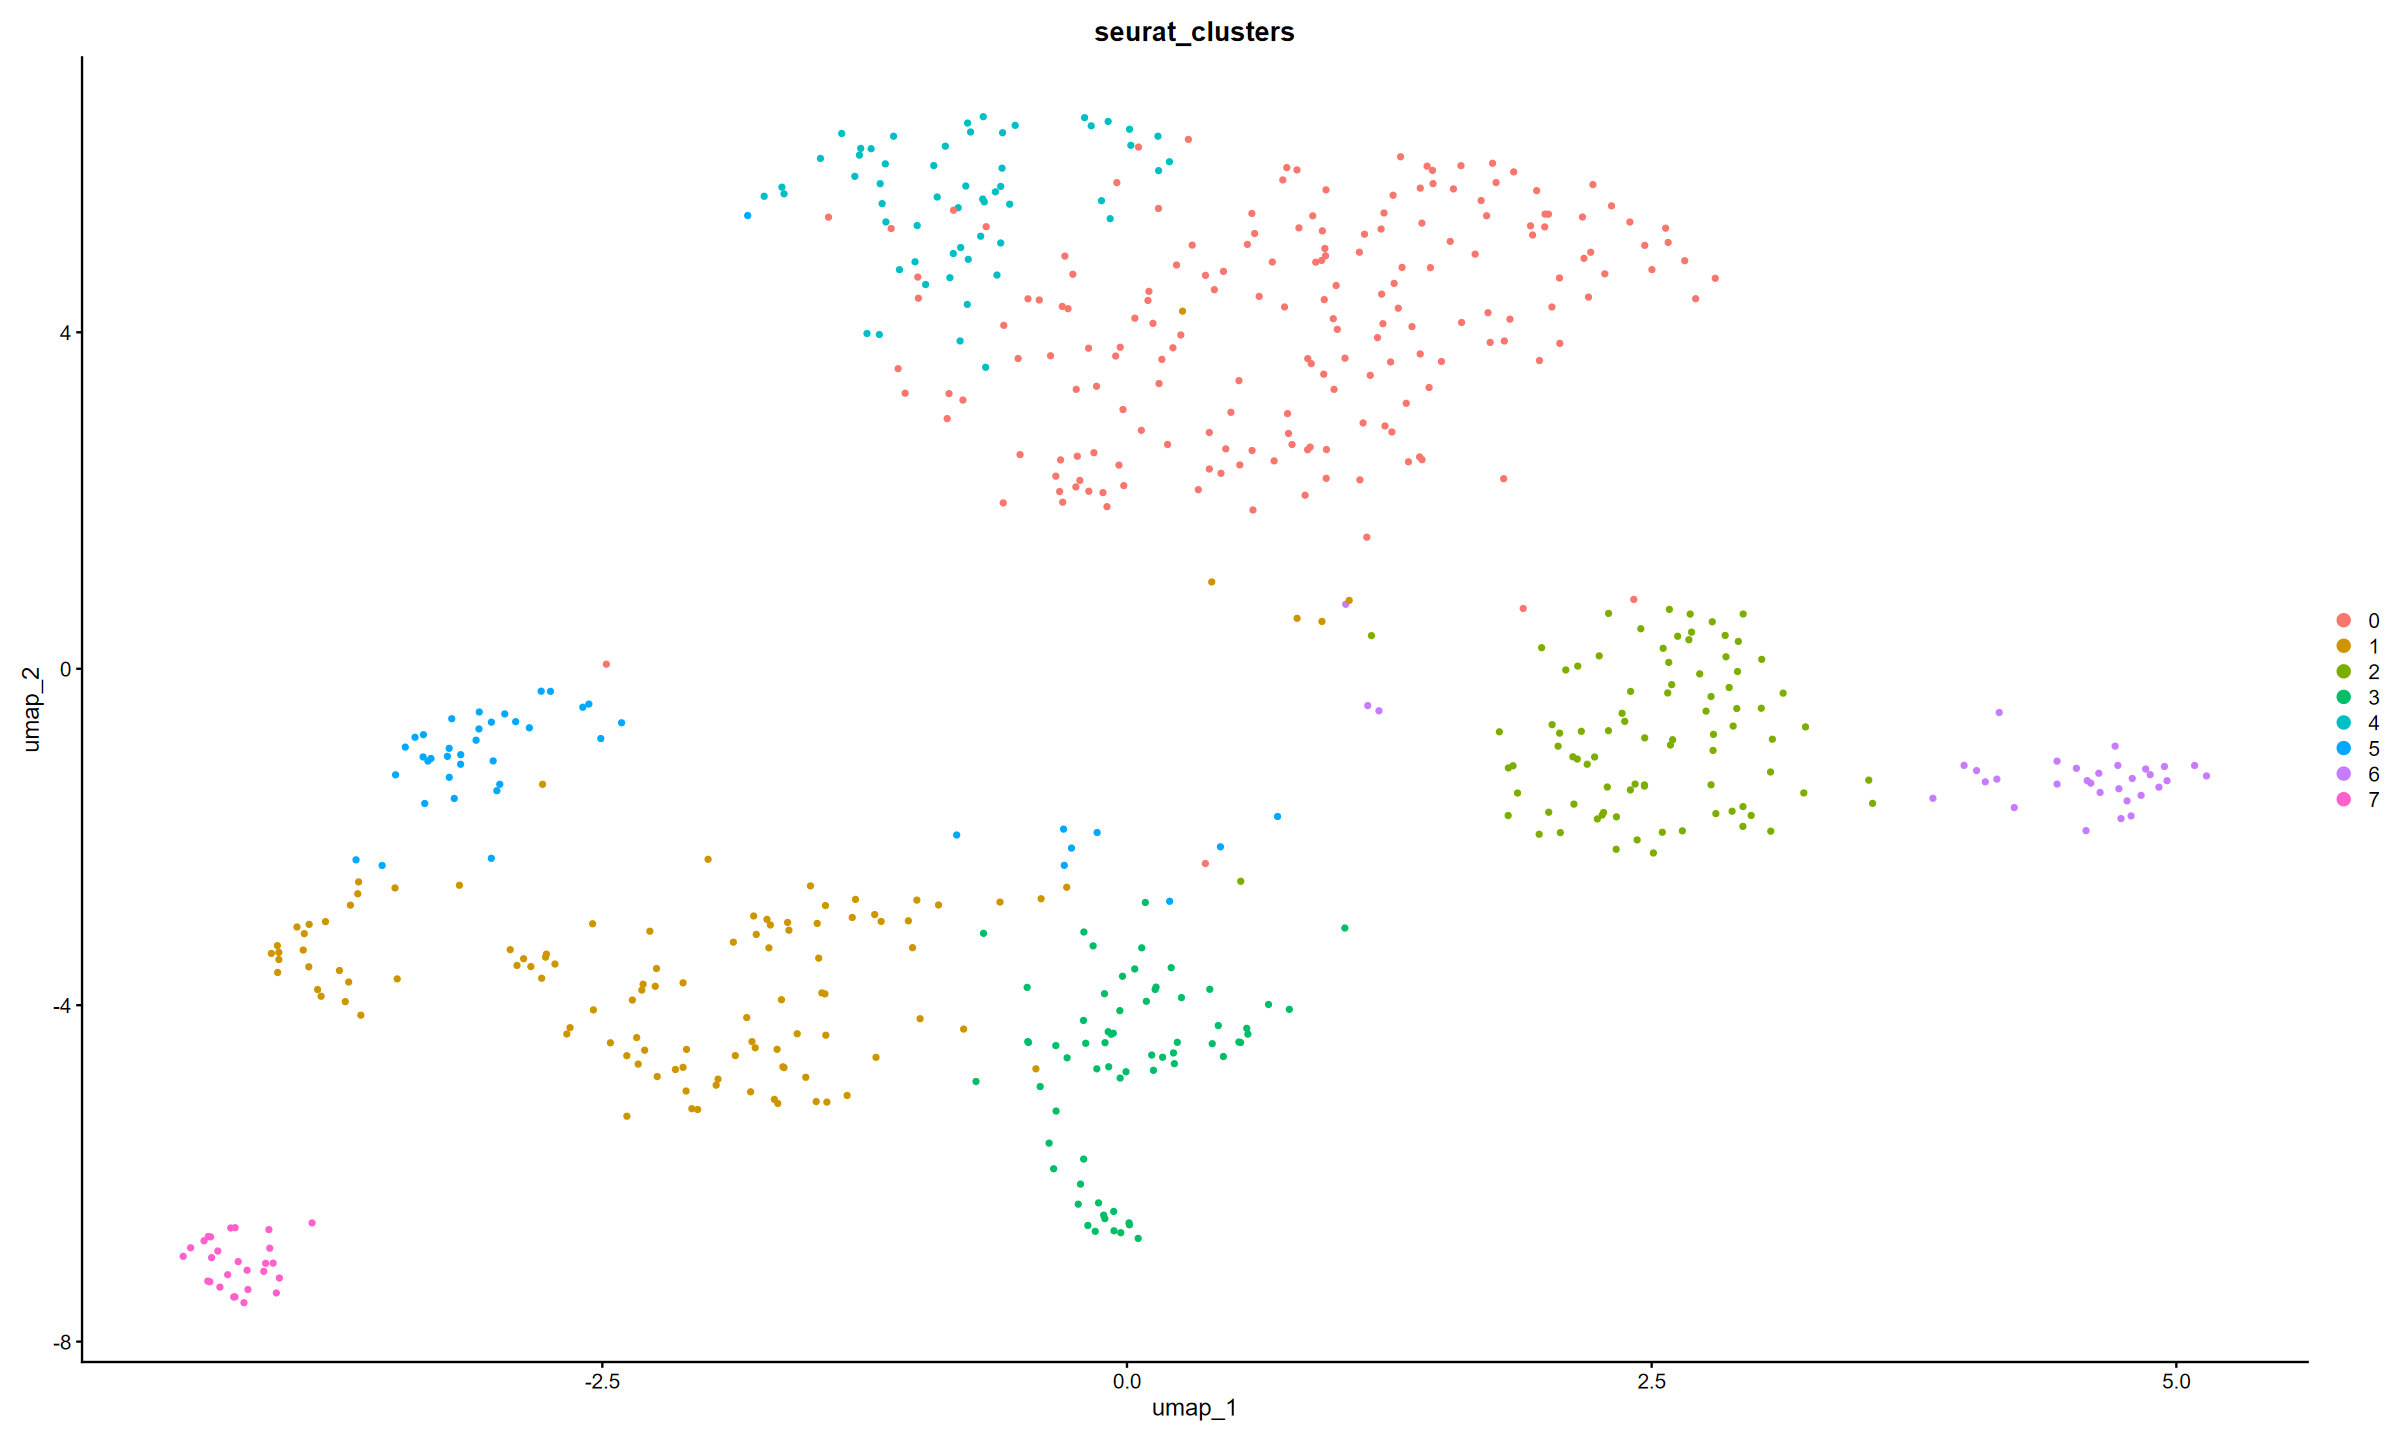

In [10]:
# Get DimPlots of different resolutions
DimPlot(myeloid_data, reduction = "umap", group.by = "seurat_clusters")

In [25]:
# Some marker genes according to Winther & Willemsen
features_inflammatory <- c("S100a8", "S100a9", "Il1b", "Casp1", "Casp4", "Nlrp3", "Tnf", "Egr1", "Zpf36", "Ier3", "Cepbp", "Cxcl2", "Ccl2-5")
features_resident <- c("Lyve1", "Cx3cr1", "Folr2", "C1qa", "C1qb", "C1qc", "Cd74", "Hla-dra", "Hla-drb1", "Pf4", "Sepp1", "Vsig4", "F13a1")
features_trem2 <- c("Trem2", "Cd9", "Fabp5", "Apoe", "Apoc1", "Spp1", "Lgals3", "Ctsb")
features_ifnic <- c("Isg15", "Irf7", "Ifit3", "Ifit1")
features_proliferating <- c("Stmn1", "Top2a", "Mki67", "Tuba1b", "Tubb5")
features_monocytes <- c("Cd14", "Cd11b", "Ccr2", "Cd16", "Cd141", "Cd11c0", "Ccr7")

# Add a module score to the Seurat object
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_inflammatory), name = "FeatureGeneScore_inflammatory")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_resident), name = "FeatureGeneScore_resident_like")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_trem2), name = "FeatureGeneScore_trem2")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_ifnic), name = "FeatureGeneScore_ifnic")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_proliferating), name = "FeatureGeneScore_proliferating")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_monocytes), name = "FeatureGeneScore_monocytes")

# Vln plots
inflammatory_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_inflammatory1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for inflammatory macrophage markers")
residents_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_resident_like1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for resident-like macrophage markers")
trem2_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_trem21", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")
ifn_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_ifnic1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")
proliferating_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_proliferating1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")
monocyte_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_monocytes1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for monocyte markers")

# Visualizing DotPlots to view marker genes
inflammatory_dot <- DotPlot(myeloid_data, features = features_inflammatory) + 
  ggtitle("Inflammatory Macrophages") + RotatedAxis()

resident_dot <- DotPlot(myeloid_data, features = features_resident) + 
  ggtitle("Resident-Like Macrophages")

TREM2_dot <- DotPlot(myeloid_data, features = features_trem2) + 
  ggtitle("TREM2 'Foamy' Macrophages")

IFNIC_dot <- DotPlot(myeloid_data, features = features_ifnic) + 
  ggtitle("IFNIC Macrophages")

proliferating_dot <- DotPlot(myeloid_data, features = features_proliferating) + 
  ggtitle("Proliferating Macrophages")

monocyte_dot <- DotPlot(myeloid_data, features = features_monocytes) + 
  ggtitle("Monocytes")

Warning message:
"The following features are not present in the object: Zpf36, Cepbp, Ccl2-5, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Hla-dra, Hla-drb1, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Cd11b, Cd16, Cd141, Cd11c0, not searching for symbol synonyms"
Warning message:
"The following requested variables were not found: Zpf36, Cepbp, Ccl2-5"
Warning message:
"The following requested variables were not found: Hla-dra, Hla-drb1"
Warning message:
"The following requested variables were not found: Cd11b, Cd16, Cd141, Cd11c0"


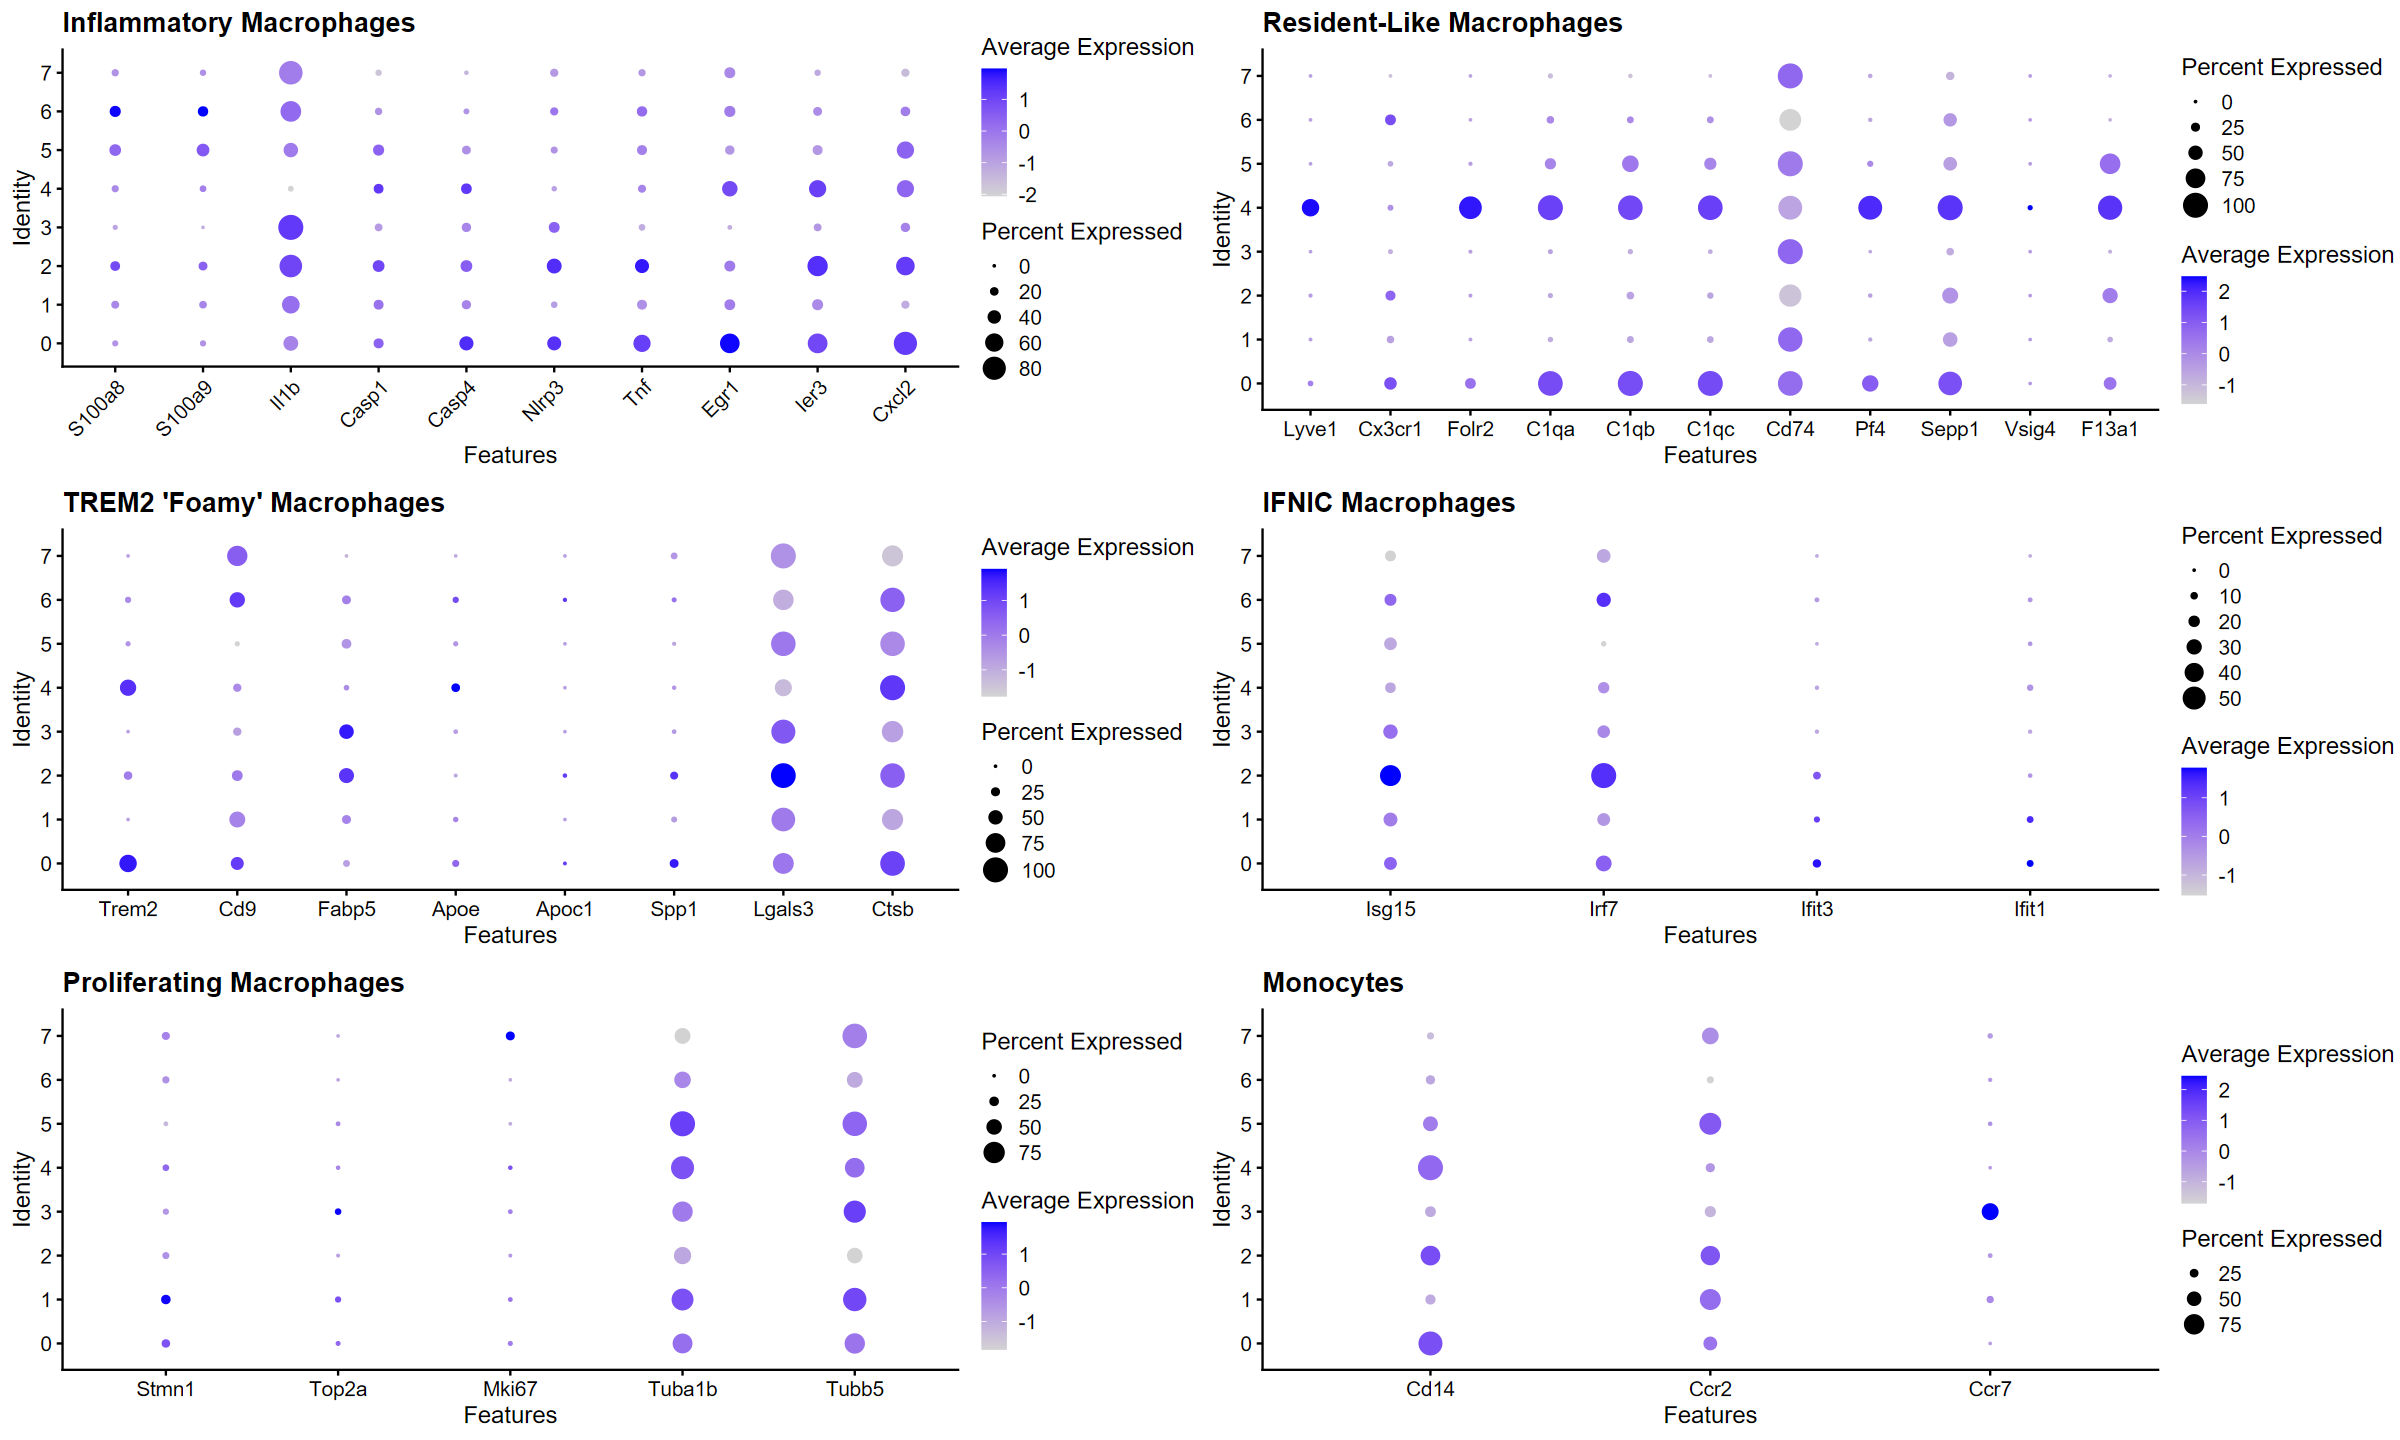

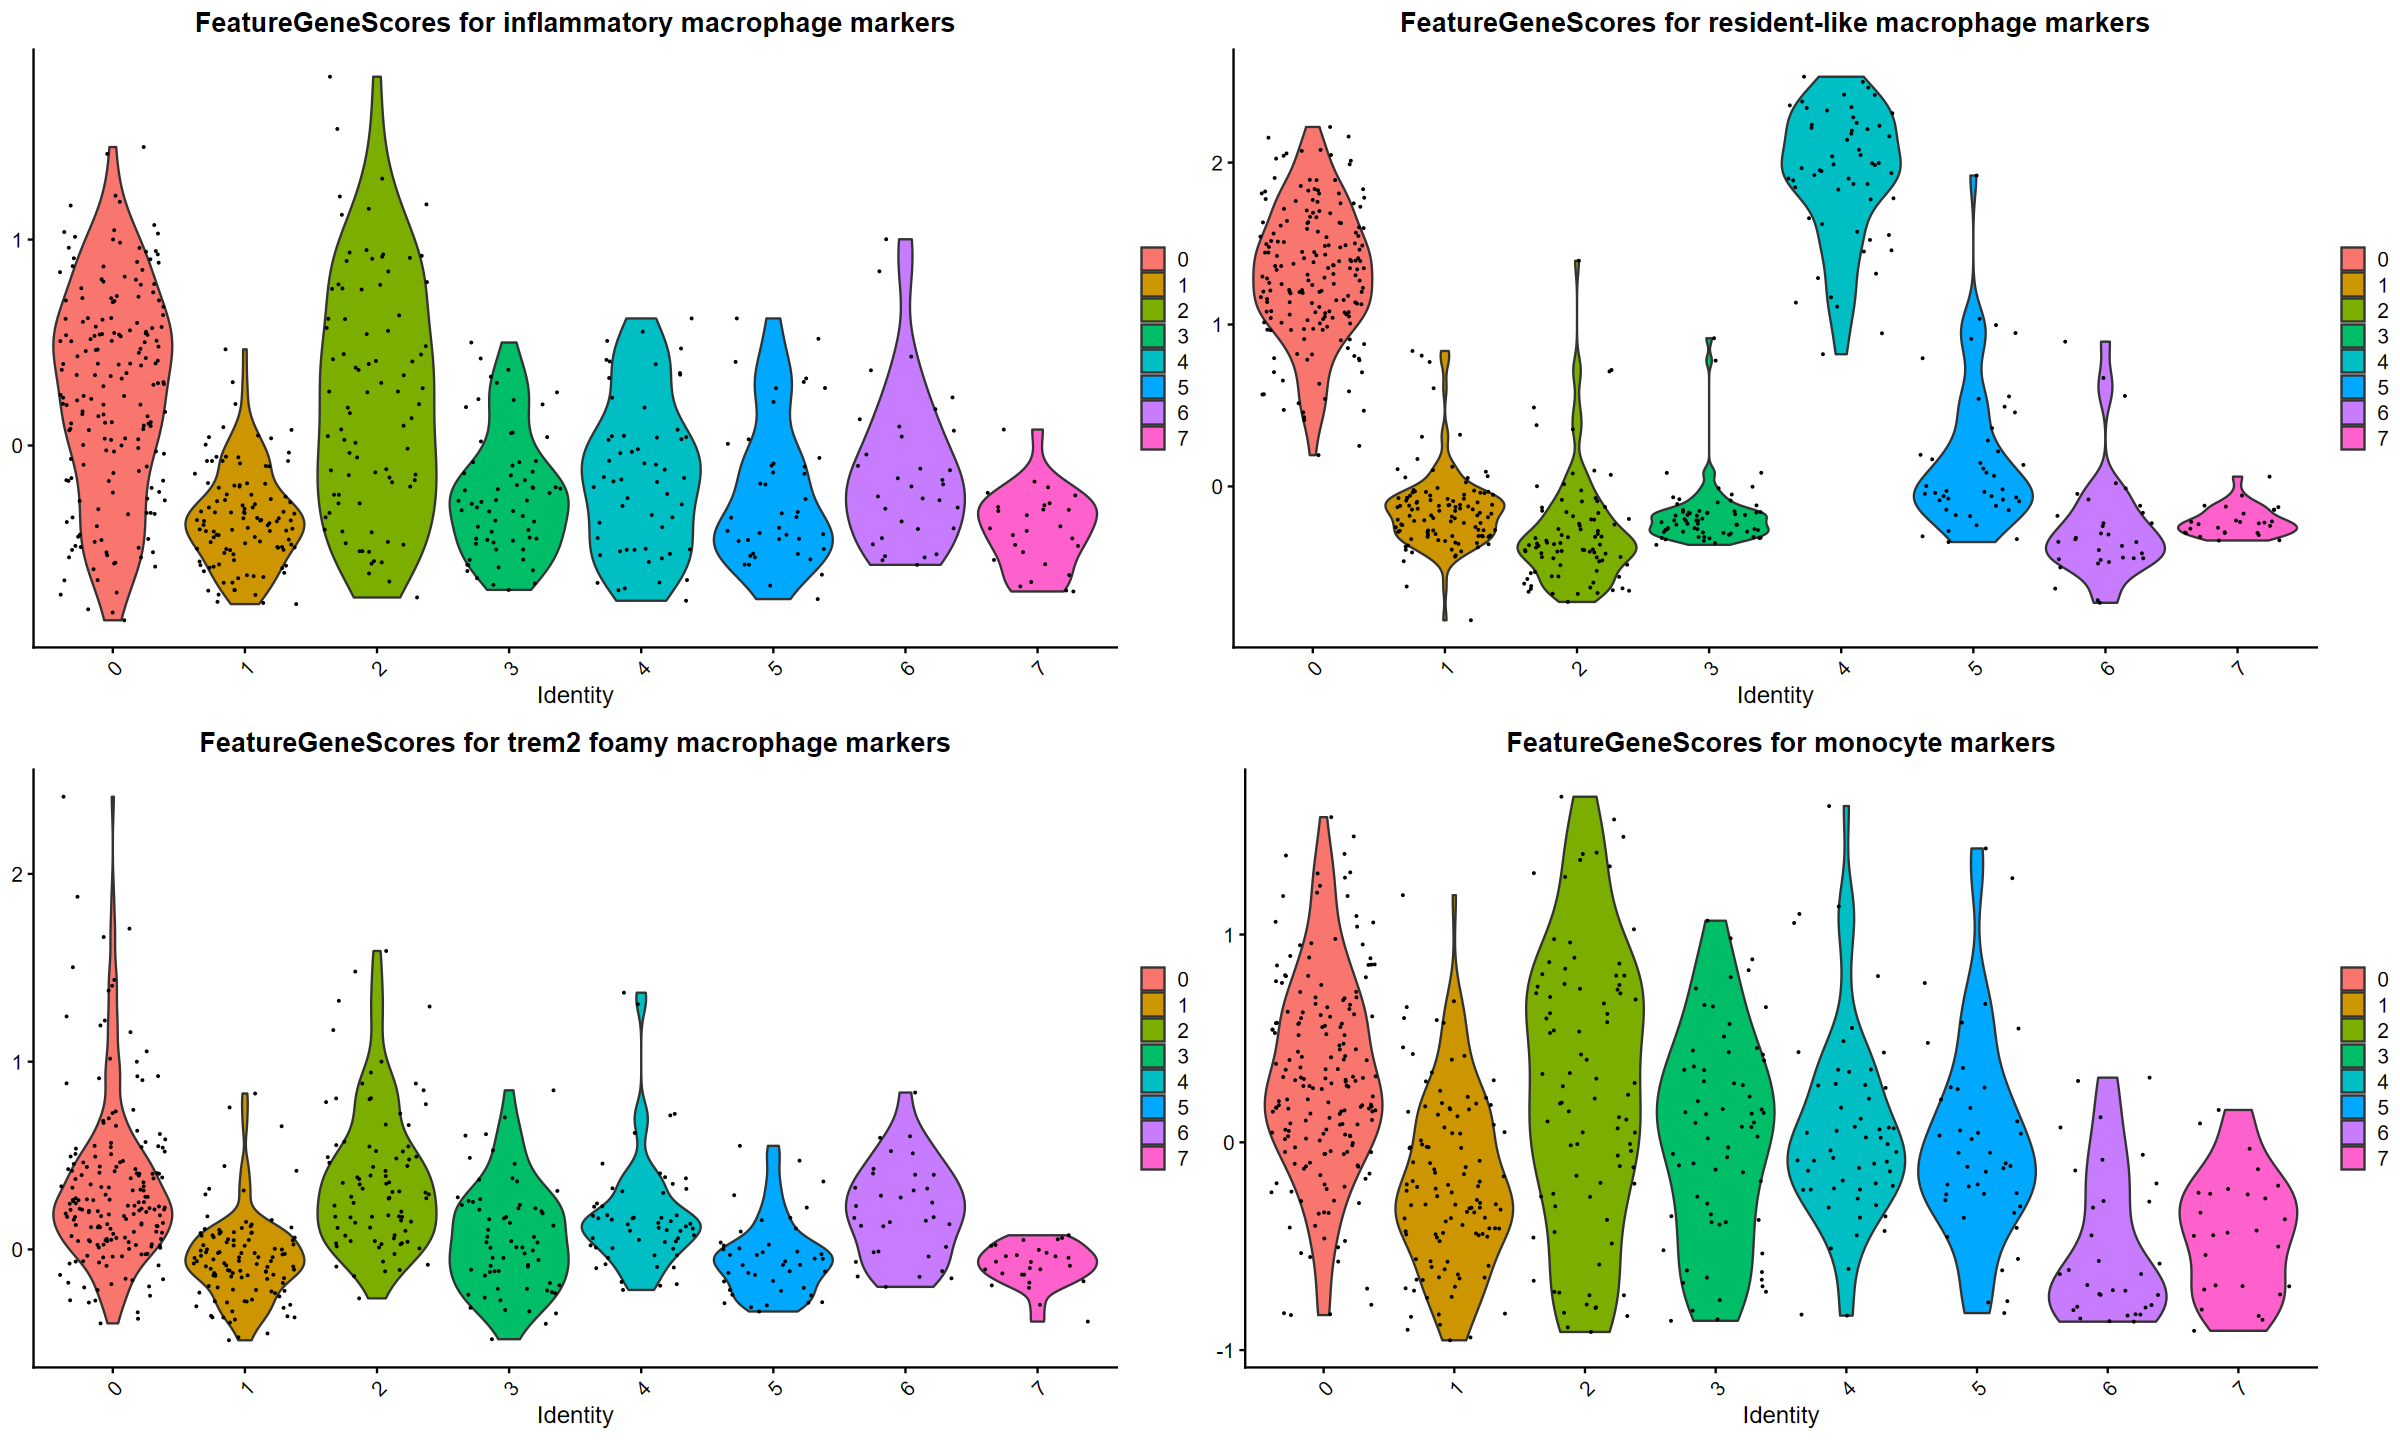

In [26]:
# Plot
grid.arrange(inflammatory_dot, resident_dot, TREM2_dot, IFNIC_dot, proliferating_dot, monocyte_dot, ncol = 2)
grid.arrange(inflammatory_vln, residents_vln, trem2_vln, monocyte_vln, ncol=2)


In [ ]:
# Find all markers for each cluster
markers <- FindAllMarkers(myeloid_data, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Create heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(myeloid_data, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [23]:
# Markers
markers %>% group_by(cluster) %>% slice_max(order_by = avg_log2FC, n = 5) %>% arrange(cluster, desc(pct.1)) 

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.289441e-60,3.373013,0.813,0.150,1.200958e-55,0,Ms4a7
3.109649e-31,3.380656,0.582,0.155,8.706395e-27,0,Cd72
1.775005e-36,3.627191,0.451,0.038,4.969658e-32,0,Ccl12
5.387270e-18,3.183936,0.390,0.103,1.508328e-13,0,Ccl7
8.522454e-21,3.880763,0.280,0.029,2.386117e-16,0,Pdgfa
6.080286e-59,3.757901,0.818,0.118,1.702359e-54,1,Cd209a
1.211334e-20,3.322666,0.364,0.057,3.391493e-16,1,Cd7
3.076102e-22,3.769686,0.327,0.037,8.612470e-18,1,Lmo1
1.577388e-16,2.851018,0.300,0.047,4.416371e-12,1,Upb1
